<a href="https://colab.research.google.com/github/bheinri2/Deep_Learning_Assessments/blob/main/Copy_of_AIT_Deep_learning_Assigment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2022 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# California housing prices - modeling
In this notebook we will: 
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Assigment: 
* please complete TODO parts


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
# from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping # Keras imports : model, layers, optimizers

In [ ]:
# load California Housing Prices dataset 
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0]

Splitting data into training, validation and test sets:

In [ ]:
valid_split = 0.2
test_split  = 0.1

v_point = int(nb_samples*(1-valid_split-test_split))
t_point = int(nb_samples*(1-test_split))

X_train = X[0:v_point]
Y_train = Y[0:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

Standardization of the data:

In [ ]:
scaler  = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)
#X_train.shape

Defining the model (with one or two hidden layers and 8-64 neurons / layer, the input and output layers' sizes are defined by the data):

In [ ]:
model = Sequential()

model.add(Dense(40, activation='relu', input_shape=(8,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))
#<TODO> # model.add(....)

Inspect the model summary:

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 40)                360       
                                                                 
 dense_30 (Dense)            (None, 20)                820       
                                                                 
 dense_31 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: 1,201


---



Compiling the model:

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

Defining the earlystopping callback function:

In [ ]:
es = EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss')

Train the model, use training and validation data and apply early stopping:

In [ ]:
model.fit(X_train, Y_train, batch_size=128, 
                            epochs=30, verbose=1, validation_split=0.2, 
                            callbacks=[es])

Epoch 1/30
91/91 [==============================] - 1s 3ms/step - loss: 3.0921 - mae: 1.3541 - val_loss: 1.4713 - val_mae: 0.9539
Epoch 2/30
91/91 [==============================] - 0s 2ms/step - loss: 1.1933 - mae: 0.7105 - val_loss: 0.9125 - val_mae: 0.7757
Epoch 3/30
91/91 [==============================] - 0s 2ms/step - loss: 0.7313 - mae: 0.5859 - val_loss: 0.6695 - val_mae: 0.6629
Epoch 4/30
91/91 [==============================] - 0s 2ms/step - loss: 0.5732 - mae: 0.5258 - val_loss: 0.5129 - val_mae: 0.5698
Epoch 5/30
91/91 [==============================] - 0s 2ms/step - loss: 0.4928 - mae: 0.4916 - val_loss: 0.4394 - val_mae: 0.5137
Epoch 6/30
91/91 [==============================] - 0s 2ms/step - loss: 0.4437 - mae: 0.4704 - val_loss: 0.3379 - val_mae: 0.4274
Epoch 7/30
91/91 [==============================] - 0s 2ms/step - loss: 0.4132 - mae: 0.4560 - val_loss: 0.3318 - val_mae: 0.4169
Epoch 8/30
91/91 [==============================] - 0s 2ms/step - loss: 0.3959 - mae: 0.44

Evaluate on the test data:

In [ ]:
model.evaluate(X_test, Y_test)

65/65 [==============================] - 0s 910us/step - loss: 0.2571 - mae: 0.3490


[0.2570916712284088, 0.3489694893360138]

Make predictions:

In [ ]:
preds = model.predict(X_test)
print(preds)

[[1.2800279 ]
 [1.3803905 ]
 [1.3053474 ]
 ...
 [0.8561919 ]
 [0.95560193]
 [0.9222964 ]]


Inspecting the result on a regression plot:

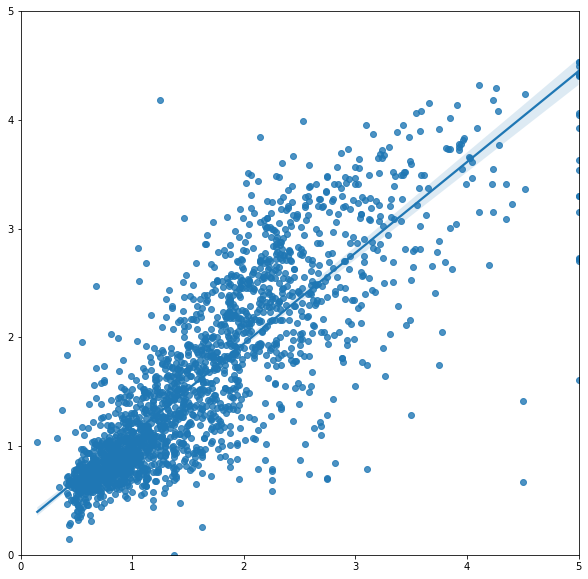

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(0,5),ylim=(0,5)); 